## Какие игры рекламировать?

Наше исследование выполнено для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Мы выявили закономерности, которые позволяют выявить популярные игры. Это поможет спланировать рекламные кампании в будущем 2017 году. Рекламируя самые востребованные игры и платформы, "Стримчик" сможет больше заработать.

Для анализа нам были доступны данные о продажах игр в 1985-2016 годах. В датасете есть информация о дате выпуска игры, платформе, на которой она выпущена, игровом жанре, продажах в разных регионах, пользовательских рейтингах и рейтингах критиков.

Мы взяли данные из открытого источника - энтузиаст по имени Rush Kirubi спарсил данные с сайта VGChartz, который публикует информацию о продажах видеоигр, и сайта Metacritic, который публикует данные о рейтингах.

Датасет был сформирован 22 декабря 2016 года.

Ссылка на первоисточник: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings 

Шаг 1 [Импорт бибилиотек, изучение документов](#the_destination)

Шаг 2 [Обработка пропусков и ошибок](#the_destination2)

Шаг 3 [Сколько игр продается больше одного года](#the_destination3)

Шаг 4 [Как продавались игры в разные годы](#the_destination4)

Шаг 5 [Жизненный цикл платформ](#the_destination5)

Шаг 6 [Влияние оценок других пользователей на продажи](#the_destination6)

Шаг 7 [Портрет пользователей разных регионов](#the_destination7)

Шаг 8 [Проверка гипотез](#the_destination8)

[Вывод](#the_destination9)

<a id='the_destination'></a>
## Импорт бибилиотек, изучение документов

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from datetime import timedelta
import datetime
import math
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_columns', 35)

In [2]:
games = pd.read_csv('/datasets/games.csv', sep=',')
games.info()
display(games)
#http://web.archive.org/web/20191118060822/http://www.vgchartz.com/yearly/2010/Global

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Вывод
В предоставленной нам таблице есть следующая информация:

Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы долларов)
EU_sales — продажи в Европе (миллионы долларов)
JP_sales — продажи в Японии (миллионы долларов)
Other_sales — продажи в других странах (миллионы долларов)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Всего в датасете данные о 16,7 тыс. игр на разных платформах.

В данных есть пропуски в столбцах с рейтингами. Как указывает создатель датасета, это происходит потому что сайт Metacritic собирает информацию не про все игровые платформы. Кроме того, рейтинг не выставляется, если игру оценило слишком мало пользователей.

<a id='the_destination2'></a>
## Обработка пропусков и ошибок

Приведем названия столбцов к нижнему регистру для удобства работы с таблицей.

In [3]:
games.columns = map(str.lower, games.columns)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Дополним нашу таблицу. У нас есть данные по продажам игр в отдельных регионах. Подсчитаем общие продажи.

In [4]:
games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


В столбце с пользовательскими оценками есть значение tbd или to be determined. Оно означает, что пользовательских оценок пока недостаточно для формирования рейтинга.

Фактически это означает отсутствие рейтинга. Поменяем tbd на нуль, чтобы можно было перевести значения столбца в числовые.

Также пропущены значения в столбце с возрастным рейтингом игр. Возможно, некоторые игры не получали этот рейтинг, потому что он не является обязательным в некоторых странах. Поменяем пропущенные значения на "no data"

In [5]:
games['user_score'] = games['user_score'].replace(to_replace='tbd',value=0)
games['user_score']=pd.to_numeric(games['user_score'])

games['rating']=games['rating'].fillna('no data')


Есть также пропущенные значения в столбцах с названием игры и годом выпуска. Посмотрим, какую долю от общего числа значений они занимают. Если небольшую, удалим строки с пропущенными значениями.

Остальные пропущенные значения заменим на нули.

In [6]:
null_columns=games.columns[games.isnull().any()]
games[null_columns].isnull().sum()

null_game=games.query('name != name | year_of_release != year_of_release')
a=null_game['total_sales'].sum()
b=games['total_sales'].sum()
print('Доля продаж, приходящихся на строки с пропушенным годом и названием игры:', a*100/b)

games=games.dropna(subset=['name', 'year_of_release'])
games.info()

games=games.fillna(0)
games.info()

display(games['user_score'].value_counts())
display(games['critic_score'].value_counts())

Доля продаж, приходящихся на строки с пропушенным годом и названием игры: 1.1366453148431253
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null float64
rating             16444 non-null object
total_sales        16444 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre          

0.0    8982
7.8     322
8.0     285
8.2     276
8.3     252
       ... 
2.3       2
0.9       2
0.7       2
9.6       2
9.7       1
Name: user_score, Length: 95, dtype: int64

0.0     8461
70.0     252
71.0     248
75.0     240
80.0     235
        ... 
20.0       3
29.0       3
17.0       1
21.0       1
13.0       1
Name: critic_score, Length: 82, dtype: int64

## Вывод

Мы подготовили таблицу к анализу. Мы удалили строки, где пропущено название игры и год выпуска игры.
Остальные пропущенные значения заменили на "нет данных" или нули, чтобы можно было обращаться с этим столбцом как числовым.

Мы подсчитали сумму общих продаж каждой игры.

<a id='the_destination3'></a>
## Сколько игр продается больше одного года

В нашем датасете есть данные о выходе игры, но нет данных о дате продаж. Эта информация есть на сайте, который служил перовисточников для нашего датасета. Попробуем проанализировать данные оттуда, чтобы понять, какая доля игр продается больше одного года. https://www.vgchartz.com/yearly/2015/Global/

Мы спарсили данные о продажах игр по годам. Мы пользовались сервисом WebArchive, кэширующим данные сайтов, чтобы данные нашего основного датасета и нового были опубликованы примерно в одно время.

Изучим, как распределены продажи игр по годам в 2005-2020 годах. В нашей новой таблице приведены данные о продажах игр для определенных платформ по годам. Там есть данные о продаже за изучаемый год и общие продажи. Столбец all_one_year маркирует игры, продажи которых происходили больше одного года.

In [7]:
games2 = pd.read_csv('gamesales.csv')
display(games2.query('year_of_sales=="2016"').sort_values(by='yearly', ascending=False).head(25))
games2.info()

,year_of_sales,name/platform,genre,yearly,total,all_one_year
1100,2016,Pokemon Sun/Moon/3DS,Role-Playing,12034530,12034530.0,True
1101,2016,FIFA 17/PS4,Sports,9581584,9581584.0,True
1102,2016,Uncharted/PS4,Action,8298741,8298741.0,True
1103,2016,Call of Duty: Infinite Warfare/PS4,Shooter,6195297,6195297.0,True
1104,2016,Battlefield 1/PS4,Shooter,5961774,5961774.0,True
1105,2016,Battlefield 1/XOne,Shooter,4219657,4219657.0,True
1106,2016,Grand Theft Auto V/PS4,Action,4104297,13637345.0,False
1107,2016,Call of Duty: Black Ops 3/PS4,Shooter,4035701,14494243.0,False
1108,2016,Tom Clancy's The Division/PS4,Misc,4029849,4029849.0,True
1109,2016,Final Fantasy XV/PS4,Role-Playing,3917803,3917803.0,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
year_of_sales    1500 non-null int64
name/platform    1500 non-null object
genre            1500 non-null object
yearly           1500 non-null int64
total            1491 non-null float64
all_one_year     1500 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 60.2+ KB


Посмотрим, какая доля игр полностью продается за один год, а какая - за несколько.

In [8]:
games2['percent_first_year']=games2['yearly']*100/games2['total']
games2=games2.dropna(subset=['percent_first_year'])
games2['percent_first_year']=games2['percent_first_year'].astype(int)

display(games2)

,year_of_sales,name/platform,genre,yearly,total,all_one_year,percent_first_year
0,2005,Nintendogs/DS,Simulation,4722694,4722694.0,True,100
1,2005,Mario Kart DS/DS,Racing,2775296,2775296.0,True,100
2,2005,Grand Theft Auto: Liberty City Stories/PSP,Action,2132118,2132118.0,True,100
3,2005,Super Mario 64 DS/DS,Platform,2029244,3275320.0,False,61
4,2005,Animal Crossing: Wild World/DS,Simulation,1699892,1699892.0,True,100
...,...,...,...,...,...,...,...
1495,2019,Farming Simulator 19/PC,Simulation,583425,583425.0,True,100
1496,2019,Bayonetta 2/NS,Action,573643,573643.0,True,100
1497,2019,Fallout 4/PS4,Role-Playing,568545,8480129.0,False,6
1498,2019,Starlink: Battle for Atlas/NS,Action-Adventure,567755,567755.0,True,100


Доля игр, продаваемых только один год (из тех, что продавались в 2005-2020 годах): 63


Text(0.5, 1.0, 'Какая доля продаж игр приходится на изучаемый год, %. На основе данных за 2005-2020 годы, %')

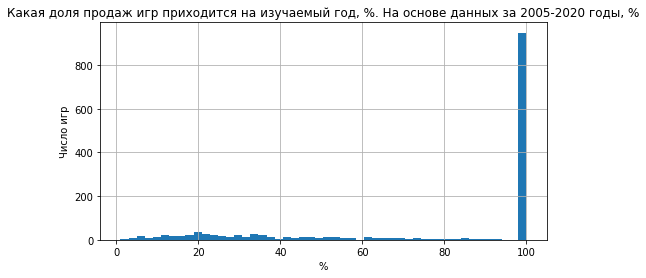

In [9]:
games2['percent_first_year'].hist(figsize=(8,4), bins=50)

prc=len(games2.query('percent_first_year==100'))
prc2=prc*100/len(games2)
prc2=pd.to_numeric(prc2)
print("Доля игр, продаваемых только один год (из тех, что продавались в 2005-2020 годах):", int(prc2))

title_string = "Какая доля продаж игр приходится на изучаемый год, %. На основе данных за 2005-2020 годы, %"
plt.ylabel('Число игр')
plt.xlabel('%')

plt.title(title_string)


Мы видим, что из тех игр, что пользователи покупали в изученные годы, 63% продавались только в течение одного года.

Но, например, Grand Theft Auto V для PS4, вышедший в 2014 году, и Call of Duty: Infinite Warfare для XOne, вышедший в 2016 году, пользовались популярностью больше одного года. И хотя разумнее всего рекламировать игру перед и сразу после релиза, когда цены на нее и спрос максимальные, в случае выхода dlc (нового платного контента, дополняющего игру), можно дать рекламу еще раз, таргетируя ее на заинтересованных в игре пользователей.

Можно было бы выгрузить с помощью Web Archive данные за 22 декабря, когда был выгружен основной датасет, но не удалось подобрать дату, когда они на 100% соответстветствовали бы. В следующий раз можно выгружать эти данные вместе.

<a id='the_destination4'></a>
## Как продавались игры в разные годы

Узнаем, как продавались игры в разных регионах по годам

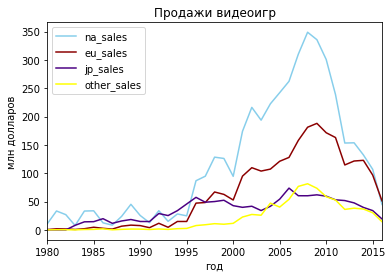

In [10]:
games_dates=games.pivot_table(index='year_of_release', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').reset_index()


games_dates.plot(x='year_of_release', y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], kind="line", legend=True, color=['skyblue', 'darkred', 'indigo', 'yellow'])

title_string = "Продажи видеоигр"

plt.xlabel('год')
plt.ylabel('млн долларов')


plt.title(title_string)
plt.legend()


Text(0.5, 1.0, 'Доходы в расчете на одну игру')

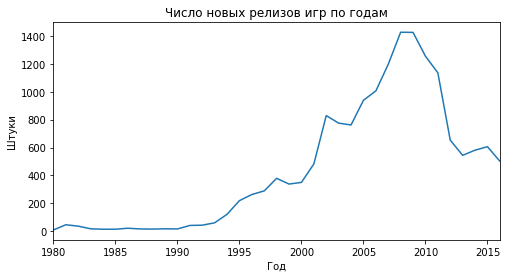

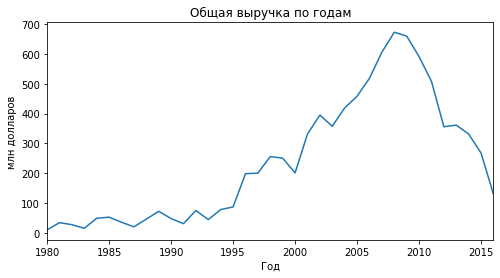

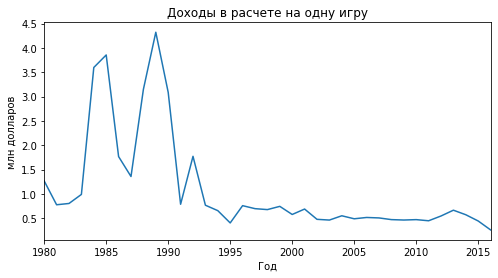

In [11]:
games_count_years=games.groupby(['year_of_release'])['name'].count().reset_index()

games_count_years.plot(x='year_of_release', y='name', kind="line", legend=False, figsize=(8, 4))

title_string = "Число новых релизов игр по годам"

plt.xlabel('Год')
plt.ylabel('Штуки')


plt.title(title_string)

games_total_sums=games.groupby(['year_of_release'])['total_sales'].sum().reset_index()

games_total_sums.plot(x='year_of_release', y='total_sales', kind="line", legend=False, figsize=(8, 4))

title_string = "Общая выручка по годам"

plt.xlabel('Год')
plt.ylabel('млн долларов')


plt.title(title_string)

per_year = pd.merge(games_count_years, games_total_sums, on='year_of_release', how='left')
per_year['per_year_sum']=per_year['total_sales']/per_year['name']

per_year.plot(x='year_of_release', y='per_year_sum', kind="line", legend=False, figsize=(8, 4))

title_string = "Доходы в расчете на одну игру"

plt.xlabel('Год')
plt.ylabel('млн долларов')


plt.title(title_string)

Если до 2010 года годовые продажи игр доходили до 700 млн долларов, то в 2016 году они составляли 130 млн долларов.
При этом выручка в расчете на игру сильно снизилась в 91-м году - после выхода хитов Super Mario (1985), Duck Hunt (1984) и Tetris (1989), но с тех пор оставалась стабильно низкой. В 2015 и 2016 годах она еще снизилась, возможно, из-за финансового кризиса.

Очевидно, мы имеем дело с падающим рынком. Возможно, игровые платформы уступают место онлайн-играм и мобильным играм.

In [12]:
games_platforms=games.pivot_table(index='year_of_release', columns='platform', values=['total_sales'], aggfunc='sum').reset_index()
games_platforms=games_platforms.set_index('year_of_release')

In [13]:
display(games['user_score'].value_counts())
display(games['critic_score'].value_counts())

0.0    8982
7.8     322
8.0     285
8.2     276
8.3     252
       ... 
2.3       2
0.9       2
0.7       2
9.6       2
9.7       1
Name: user_score, Length: 95, dtype: int64

0.0     8461
70.0     252
71.0     248
75.0     240
80.0     235
        ... 
20.0       3
29.0       3
17.0       1
21.0       1
13.0       1
Name: critic_score, Length: 82, dtype: int64

<a id='the_destination5'></a>
## Жизненный цикл платформы

Пользователи покупают игры под свою платформу. Посмотрим, для каких платформ выпускались игры в разное время.

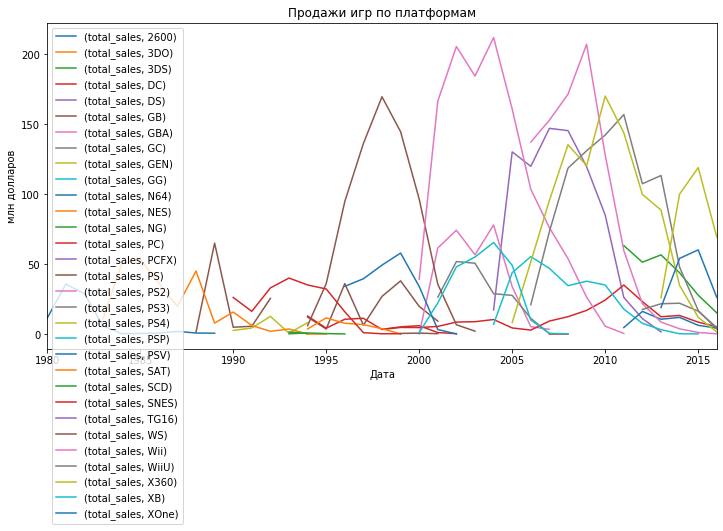

In [14]:
games_platforms=games_platforms.reset_index()
ax = plt.gca()
games_platforms.plot(x='year_of_release', ax=ax, kind="line", legend=True, figsize=(12, 6))

title_string = "Продажи игр по платформам"

plt.xlabel('Дата')
plt.ylabel('млн долларов')


plt.title(title_string)
plt.legend()


Каждая платформа появляется на рынке на несколько лет, а потом ее сменяют другие. Долго на рынке находится PC, но это скорее исключение, обусловленное широким распространением персональных компьютеров. В 2016 году на рынке не было растущих платформ.

Узнаем, каков срок жизни платформы.

Для начала посмотрим, как продавались игры по платформам по годам. Это позволит нам отсечь для каждой платформы годы с маленькими продажами.

Text(0.5, 1.0, 'Распределение годовых продаж игр на разных платформах')

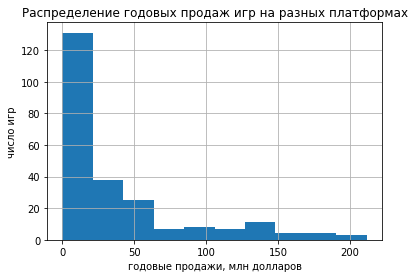

In [15]:
games_gr=games.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
ax=games_gr['total_sales'].hist(bins=10)


title_string = "Распределение годовых продаж игр на разных платформах"
ax.set_ylabel("число игр")
ax.set_xlabel("годовые продажи, млн долларов")

plt.title(title_string)

Сделаем отсечение по месяцам, когда продажи игр на платформе были ниже 20 млн долларов.

Узнаем среднее число лет, когда у платформ были сравнительно высокие продажи (больше 20 млн долларов).

Средний срок жизни платформы: 7.67741935483871
Средний срок жизни платформы (без учета лет с низкими продажами): 5.4


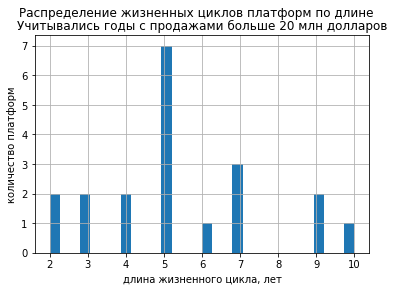

In [16]:
games_gr_2=games_gr.query('total_sales>20').groupby(['platform'])['total_sales'].count().reset_index()
#games_gr_piv=games_gr.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='count').reset_index()
ax=games_gr_2['total_sales'].hist(bins=30)
games_gr_3=games_gr.groupby(['platform'])['total_sales'].count().reset_index()

ax.set_ylabel("количество платформ")
ax.set_xlabel("длина жизненного цикла, лет")
plt.suptitle("Распределение жизненных циклов платформ по длине")
plt.title("Учитывались годы с продажами больше 20 млн долларов")


print('Средний срок жизни платформы:', games_gr_3['total_sales'].mean())
print('Средний срок жизни платформы (без учета лет с низкими продажами):', games_gr_2['total_sales'].mean())


Это значит, что нам надо планировать рекламу игр на платформах, которые популярны сейчас или релиз которых запланирован на 2017 год. Узнаем, какие самые популярные платформы 2016 года.

In [17]:
top_pl_2016=games.query('year_of_release==2016').groupby('platform')['total_sales'].sum().reset_index()
display(top_pl_2016.sort_values(by='total_sales', ascending=False))

top_pl_2016=top_pl_2016.query('total_sales>5')
top_pl_2016=top_pl_2016['platform'].tolist()



,platform,total_sales
3,PS4,69.25
8,XOne,26.15
0,3DS,15.14
1,PC,5.25
6,WiiU,4.60
4,PSV,4.25
2,PS3,3.60
7,X360,1.52
5,Wii,0.18


Самые продаваемые платформы в 2016 году - PS4, XOne и 3DS.  Кроме этого довольно популярны игры для персонального компьютера.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'млн долларов')

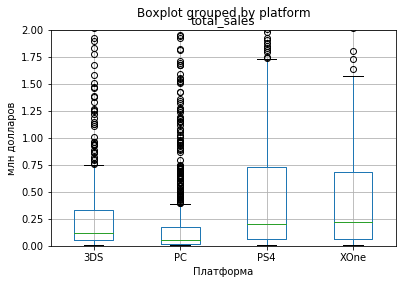

In [18]:
games_box=games.query('platform in @top_pl_2016').groupby(['name', 'platform']).agg({'total_sales':'sum'})
games_box.boxplot('total_sales', by='platform')
plt.ylim(0,2)

title_string = "Продажи игр по платформам в 2016 году"

plt.xlabel('Платформа')
plt.ylabel('млн долларов')



In [19]:
top_pl_2016_count=games.groupby('platform')['total_sales'].count().reset_index()
top_pl_2016_median=games.groupby('platform')['total_sales'].median().reset_index()
top_pl_2016_mean=games.groupby('platform')['total_sales'].mean().reset_index()


print("Число игр, выпущенных с 2013 года на двух самых популярных сейчас платформах", top_pl_2016_count.query('platform=="XOne"|platform=="PS4"'))
print("Медиана выручки с каждой игры, выпущенной с 2013 года на двух самых популярных сейчас платформах", top_pl_2016_median.query('platform=="XOne"|platform=="PS4"'))
print("Среднее выручки с каждой игры, выпущенной с 2013 года на двух самых популярных сейчас платформах", top_pl_2016_mean.query('platform=="XOne"|platform=="PS4"'))

Число игр, выпущенных с 2013 года на двух самых популярных сейчас платформах    platform  total_sales
18      PS4          392
30     XOne          247
Медиана выручки с каждой игры, выпущенной с 2013 года на двух самых популярных сейчас платформах    platform  total_sales
18      PS4         0.20
30     XOne         0.22
Среднее выручки с каждой игры, выпущенной с 2013 года на двух самых популярных сейчас платформах    platform  total_sales
18      PS4     0.801378
30     XOne     0.645020


Самые популярные сейчас платформы, XOne и PS4, были выпущены на рынок в 2013 году. С тех пор для PS4 вышло в 1,5 раза больше игр. Медианные выручки каждой игры на этих платформах почти одинаковые (у XOne немного больше - 0,22 млн долларов против 0,2). Но средний показатель выше у PS4 благодаря очень успешным продажам Call of Duty, GTA и FIFA.

Многие игры - кросплатформенные, то есть выходят сразу на нескольких платформах. Узнаем, где выручка таких игр больше - на PS4 или XOne.

In [20]:
top_pl_2016_names=games.query('platform=="XOne"|platform=="PS4"').pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').reset_index()
top_pl_2016_names=top_pl_2016_names.query('PS4.notna()&XOne.notna()')

print('Суммарные продажи игр, которые выходили и на PS4, и на XOne')
print('PS4:', top_pl_2016_names['PS4'].sum(), 'млн долларов')
print('XOne', top_pl_2016_names['XOne'].sum(), 'млн долларов')




Суммарные продажи игр, которые выходили и на PS4, и на XOne
PS4: 256.35 млн долларов
XOne 129.36 млн долларов


Суммарная выручка одних и тех же игр почти в два раза больше на PS4.

## Вывод
Жизненный цикл платформы - около 5 лет. Рекламировать стоит те платформы, которые показали хорошие результаты или рост за предыдущий год.

В 2016 году наиболее продаваемые игры выходили на Play Station 4 и Xbox One и портативной приставке 3DS от Nintendo. Кроме этого довольно популярны игры для персонального компьютера. И хотя PC отстает от трех самых продаваемых платформ - формально PC можно было бы отбросить, не стоит этого делать. Эта платформа - долгожитель, и держит популярность дольше среднего, как видно на графике выше.

Самые популярные сейчас платформы, XOne и PS4, были выпущены на рынок в 2013 году. С тех пор для PS4 вышло в 1,5 раза больше игр (392 против 247). Медианные выручки каждой игры на этих платформах почти одинаковые (у XOne немного больше - 0,22 млн долларов против 0,2). Но средний показатель выше у PS4 благодаря очень успешным продажам Call of Duty, GTA и FIFA.

Суммарная выручка одних и тех же игр почти в два раза больше на PS4.

<a id='the_destination6'></a>
## Влияние оценок других пользователей на продажи

Узнаем, зависят ли продажи игр от оценок критиков и других пользователей.

Text(0.5, 0, 'общие продажи')

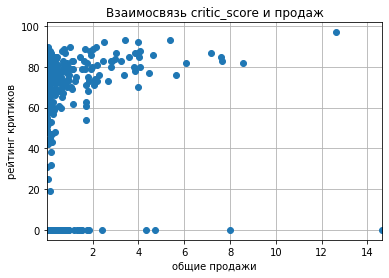

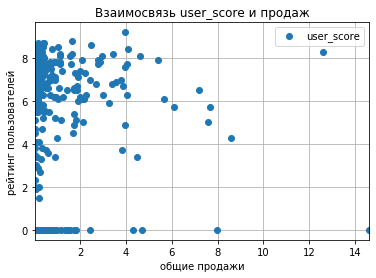

In [21]:
#flats_table['ceiling_height'].plot(style='o', ylim=(0,40), title='Квартиры на каких этажах есть в таблице')
ax=games.query('platform=="PS4"').plot(x='total_sales', y=['critic_score'], legend=False, style='o', grid=True, title='Взаимосвязь critic_score и продаж')
ax.set_ylabel("рейтинг критиков")
ax.set_xlabel("общие продажи")

ax=games.query('platform=="PS4"').plot(x='total_sales', y='user_score', style='o', grid=True, title='Взаимосвязь user_score и продаж')
ax.set_ylabel("рейтинг пользователей")
ax.set_xlabel("общие продажи")

При вычислении корреляции будем смотреть только на последние 10 лет и отбросим строки, где нет оценок пользователей и критиков.

In [22]:
display(games.query('critic_score!=0').corr())
display(games.query('user_score!=0').corr())

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.002386,0.050745,-0.026317,0.053747,0.011411,0.040142,0.020107
na_sales,-0.002386,1.000000,0.842492,0.470186,0.728083,0.240083,0.129744,0.956061
eu_sales,0.050745,0.842492,1.000000,0.520845,0.718019,0.221276,0.111731,0.939557
jp_sales,-0.026317,0.470186,0.520845,1.000000,0.397317,0.153474,0.126538,0.614425
other_sales,0.053747,0.728083,0.718019,0.397317,1.000000,0.198410,0.106886,0.805179
critic_score,0.011411,0.240083,0.221276,0.153474,0.198410,1.000000,0.456652,0.245349
user_score,0.040142,0.129744,0.111731,0.126538,0.106886,0.456652,1.000000,0.136163
total_sales,0.020107,0.956061,0.939557,0.614425,0.805179,0.245349,0.136163,1.000000


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.030771,0.028956,-0.046200,0.031480,-0.141088,-0.268211,-0.007428
na_sales,-0.030771,1.000000,0.837813,0.466614,0.722749,0.176332,0.085873,0.954859
eu_sales,0.028956,0.837813,1.000000,0.518017,0.713893,0.158355,0.055397,0.938074
jp_sales,-0.046200,0.466614,0.518017,1.000000,0.393403,0.125943,0.126426,0.612200
other_sales,0.031480,0.722749,0.713893,0.393403,1.000000,0.133832,0.056973,0.802185
critic_score,-0.141088,0.176332,0.158355,0.125943,0.133832,1.000000,0.419699,0.179361
user_score,-0.268211,0.085873,0.055397,0.126426,0.056973,0.419699,1.000000,0.088110
total_sales,-0.007428,0.954859,0.938074,0.612200,0.802185,0.179361,0.088110,1.000000


In [23]:
games['critic_score'].value_counts()


0.0     8461
70.0     252
71.0     248
75.0     240
80.0     235
        ... 
20.0       3
29.0       3
17.0       1
21.0       1
13.0       1
Name: critic_score, Length: 82, dtype: int64

In [24]:
games['user_score'].value_counts()

0.0    8982
7.8     322
8.0     285
8.2     276
8.3     252
       ... 
2.3       2
0.9       2
0.7       2
9.6       2
9.7       1
Name: user_score, Length: 95, dtype: int64

## Вывод

Как видим, продажи больше коррелируют с оценками критиков, чем оценками других пользователей (0,33 против 0,03). Что интересно, влияние мнения критиков выше в Европе (0,3) и Северной Америке (0,3), чем в Японии (0,13).

Зато в Японии больше влияние оценок пользователей (0,13 в Японии против 0,06 в Европе и 0,09 в США).

Этот показатель не может быть единственным при принятии решения. У многих игр отсутствует рейтинг, в общей сложности примерно у половины. В том числе у тех, что показавали большие продажи. Характерный пример - Call of Duty: Black Ops 3, который собрал 14,63 млн долларов или около 5% выручки всех игр в 2015 году.

Возможно, следует усовершенствовать методику сбора информации о рейтингах игр.

<a id='the_destination7'></a>
## Самые популярные жанры

Определим самые популярные жанры игр.

Самые продаваемые игровые жанры. Продажи в среднем на игру, млн долларов
           genre  total_sales
8        Shooter     1.335469
10        Sports     0.680000
4       Platform     0.476053
2       Fighting     0.470333
7   Role-Playing     0.459005
6         Racing     0.398841
3           Misc     0.332301
0         Action     0.322068
9     Simulation     0.298409
5         Puzzle     0.157857
11      Strategy     0.107027
1      Adventure     0.094865

Самые продаваемые игровые жанры. Общие продажи, млн долларов
           genre  total_sales
0         Action       199.36
8        Shooter       170.94
10        Sports       109.48
7   Role-Playing       101.44
3           Misc        37.55
2       Fighting        28.22
6         Racing        27.52
4       Platform        18.09
1      Adventure        17.55
9     Simulation        13.13
11      Strategy         3.96
5         Puzzle         2.21


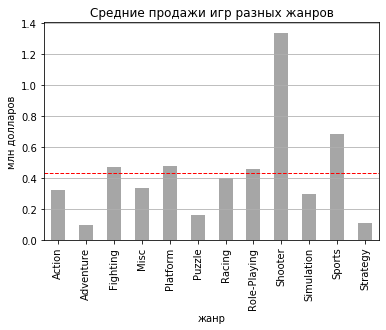

In [25]:
games_2016=games.query('year_of_release>2013')
games_genres_mean=games_2016.pivot_table(index='genre', values='total_sales', aggfunc='mean').reset_index()
games_genres_sum=games_2016.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index()

print('Самые продаваемые игровые жанры. Продажи в среднем на игру, млн долларов')
print(games_genres_mean.sort_values(by='total_sales', ascending=False))
print()
print('Самые продаваемые игровые жанры. Общие продажи, млн долларов')
print(games_genres_sum.sort_values(by='total_sales', ascending=False))

games_genres_mean_mean=games_genres_mean['total_sales'].mean()



games_genres_mean.plot(x='genre', y='total_sales', kind="bar", legend=False, color='grey', alpha=0.7)
plt.title('Средние продажи игр разных жанров')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.ylabel('млн долларов')
plt.xlabel('жанр')

plt.axhline(y=games_genres_mean_mean, color='red', linestyle='dashed', linewidth=1)
plt.show()

В 2014-2016 годах "стрелялки" в среднем продавались в несколько раз лучше, чем игры других жанров (1,3 млн долларов в среднем на игру, что примерно в три раза лучше среднего). На втором месте - спортивные игры (0,7 млн долларов на игру).

Кроме этого, выше среднего продажи игр в следующих жанрах: Fighting, Platform, Role-Playing.

Игры жанра Action дают большой доход в целом, но принадлежность к этому жанру - не залог успеха. Таких игр выпускается очень много, и многие из них проваливаются.

<a id='the_destination8'></a>
## Портрет пользователей разных регионов

## Платформы

Узнаем, игры каких платформ были самыми продаваемыми в 2016 году.

In [26]:
top_platforms=games.query('year_of_release==2016').pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
print(top_platforms.head())

  platform  eu_sales  jp_sales  na_sales
0      3DS      2.33      8.03      4.14
1       PC      3.53      0.00      1.36
2      PS3      1.26      1.30      0.67
3      PS4     31.78      5.74     21.49
4      PSV      0.39      3.56      0.15


In [27]:
top_platforms['eu_sales_total_share']=(top_platforms['eu_sales']*100/top_platforms['eu_sales'].sum()).astype(int)
top_platforms['jp_sales_total_share']=(top_platforms['jp_sales']*100/top_platforms['jp_sales'].sum()).astype(int)
top_platforms['na_sales_total_share']=(top_platforms['na_sales']*100/top_platforms['na_sales'].sum()).astype(int)

print(top_platforms.head(5))

  platform  eu_sales  jp_sales  na_sales  eu_sales_total_share  \
0      3DS      2.33      8.03      4.14                     4   
1       PC      3.53      0.00      1.36                     6   
2      PS3      1.26      1.30      0.67                     2   
3      PS4     31.78      5.74     21.49                    62   
4      PSV      0.39      3.56      0.15                     0   

   jp_sales_total_share  na_sales_total_share  
0                    41                     9  
1                     0                     3  
2                     6                     1  
3                    29                    47  
4                    18                     0  


In [28]:
top_platforms_eu=top_platforms[['platform', 'eu_sales_total_share']]
top_platforms_eu5=top_platforms_eu.nlargest(5, 'eu_sales_total_share')

new_row = pd.DataFrame(data = {
    'platform' : ['others'],
    'eu_sales_total_share' : [100-top_platforms_eu['eu_sales_total_share'].sum()]
})

top_platforms_eu5 = pd.concat([top_platforms_eu5, new_row])


In [29]:
top_platforms_jp=top_platforms[['platform', 'jp_sales_total_share']]
top_platforms_jp5=top_platforms_jp.nlargest(5, 'jp_sales_total_share')

new_row = pd.DataFrame(data = {
    'platform' : ['others'],
    'jp_sales_total_share' : [100-top_platforms_jp['jp_sales_total_share'].sum()]
})

top_platforms_jp = pd.concat([top_platforms_jp5, new_row])

In [30]:
top_platforms_na=top_platforms[['platform', 'na_sales_total_share']]
top_platforms_na5=top_platforms_na.nlargest(5, 'na_sales_total_share')

new_row = pd.DataFrame(data = {
    'platform' : ['others'],
    'na_sales_total_share' : [100-top_platforms_na['na_sales_total_share'].sum()]
})

top_platforms_na = pd.concat([top_platforms_na5, new_row])

In [31]:
result_platform = pd.merge(top_platforms_eu5, top_platforms_jp5, on='platform', how='outer')
result_platform = pd.merge(result_platform, top_platforms_na5, on='platform', how='outer')
result_platform=result_platform.set_index('platform')
result_platform=result_platform.transpose()

In [32]:
print(result_platform)

platform               PS4  XOne   PC   3DS  PS3  others   PSV  WiiU
eu_sales_total_share  62.0  18.0  6.0   4.0  2.0     5.0   NaN   NaN
jp_sales_total_share  29.0   NaN  NaN  41.0  6.0     NaN  18.0   3.0
na_sales_total_share  47.0  31.0  3.0   9.0  NaN     NaN   NaN   4.0


platform               PS4  XOne   PC   3DS  PS3  others   PSV  WiiU
eu_sales_total_share  62.0  18.0  6.0   4.0  2.0     5.0   NaN   NaN
jp_sales_total_share  29.0   NaN  NaN  41.0  6.0     NaN  18.0   3.0
na_sales_total_share  47.0  31.0  3.0   9.0  NaN     NaN   NaN   4.0


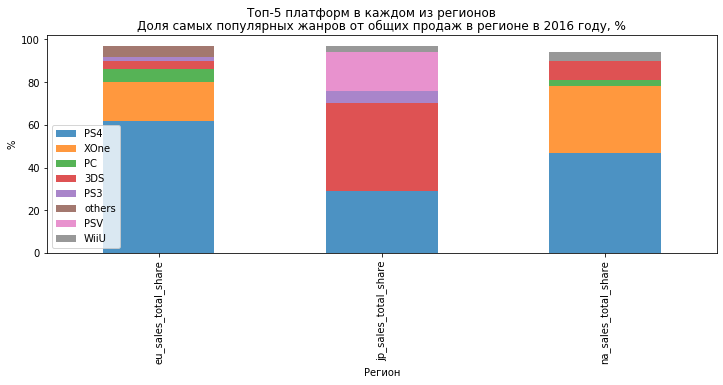

In [33]:
result_platform.plot(kind='bar', stacked='True', figsize=(12,4), alpha=0.8)
subtitle_string = "Топ-5 платформ в каждом из регионов"
title_string = "Доля самых популярных жанров от общих продаж в регионе в 2016 году, %"

plt.xlabel('Регион')
plt.ylabel('%')

plt.suptitle(subtitle_string)
plt.title(title_string)
plt.legend()
print(result_platform)

В Европе и Северной Америке лидируют Play Station 4 и Xbox One. В обоих регионах на игры для этих двух платформ приходится 80% рынка игр.
В Японии ситуация другая, там заметное место занимают портативные платформы (те, для которых не нужен экран; они хорошо подходят для игры, например, в транспорте). На первом по продажам месте там игры для 3DS от Nintendo, а третье - портативная PSV. ПРи этом в Японии, в отличие от Европы и Северной Америки, почти не играют на PC.

PS4 занимает в Японии второе место по продажам игр, то есть эта платформа популярна во всех трех регионах.

In [34]:
top_genres=games.query('year_of_release>2015').pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
print(top_genres)

           genre  eu_sales  jp_sales  na_sales
0         Action     10.68      7.07      9.29
1      Adventure      1.32      1.18      0.95
2       Fighting      1.34      0.75      1.84
3           Misc      0.66      1.04      0.76
4       Platform      1.39      0.11      1.29
5         Puzzle      0.01      0.00      0.00
6         Racing      1.77      0.01      0.73
7   Role-Playing      4.28      6.61      5.89
8        Shooter     15.90      1.06     16.24
9     Simulation      1.27      0.33      0.16
10        Sports     12.01      0.92      7.54
11      Strategy      0.59      0.23      0.24


In [35]:
top_genres['eu_sales_total_share']=(top_genres['eu_sales']*100/top_genres['eu_sales'].sum()).astype(int)
top_genres['jp_sales_total_share']=(top_genres['jp_sales']*100/top_genres['jp_sales'].sum()).astype(int)
top_genres['na_sales_total_share']=(top_genres['na_sales']*100/top_genres['na_sales'].sum()).astype(int)

print(top_platforms.head(5))

  platform  eu_sales  jp_sales  na_sales  eu_sales_total_share  \
0      3DS      2.33      8.03      4.14                     4   
1       PC      3.53      0.00      1.36                     6   
2      PS3      1.26      1.30      0.67                     2   
3      PS4     31.78      5.74     21.49                    62   
4      PSV      0.39      3.56      0.15                     0   

   jp_sales_total_share  na_sales_total_share  
0                    41                     9  
1                     0                     3  
2                     6                     1  
3                    29                    47  
4                    18                     0  


## Жанры

In [36]:
top_genres_eu=top_genres[['genre', 'eu_sales_total_share']]
top_genres_eu5=top_genres_eu.nlargest(5, 'eu_sales_total_share')

new_row = pd.DataFrame(data = {
    'genre' : ['others'],
    'eu_sales_total_share' : [100-top_genres_eu5['eu_sales_total_share'].sum()]
})

top_genres_eu5 = pd.concat([top_genres_eu5, new_row])

print(top_genres_eu5)

           genre  eu_sales_total_share
8        Shooter                    31
10        Sports                    23
0         Action                    20
7   Role-Playing                     8
6         Racing                     3
0         others                    15


In [37]:
top_genres_jp=top_genres[['genre', 'jp_sales_total_share']]
top_genres_jp5=top_genres_jp.nlargest(5, 'jp_sales_total_share')

new_row = pd.DataFrame(data = {
    'genre' : ['others'],
    'jp_sales_total_share' : [100-top_genres_jp5['jp_sales_total_share'].sum()]
})

top_genres_jp5 = pd.concat([top_genres_jp5, new_row])

print(top_genres_jp5)

          genre  jp_sales_total_share
0        Action                    36
7  Role-Playing                    34
1     Adventure                     6
3          Misc                     5
8       Shooter                     5
0        others                    14


In [38]:
top_genres_na=top_genres[['genre', 'na_sales_total_share']]
top_genres_na5=top_genres_na.nlargest(5, 'na_sales_total_share')

new_row = pd.DataFrame(data = {
    'genre' : ['others'],
    'na_sales_total_share' : [100-top_genres_na5['na_sales_total_share'].sum()]
})

top_genres_na5 = pd.concat([top_genres_na5, new_row])

print(top_genres_na5)

           genre  na_sales_total_share
8        Shooter                    36
0         Action                    20
10        Sports                    16
7   Role-Playing                    13
2       Fighting                     4
0         others                    11


genre                 Shooter  Sports  Action  Role-Playing  Racing  others  \
eu_sales_total_share     31.0    23.0    20.0           8.0     3.0    15.0   
jp_sales_total_share      5.0     NaN    36.0          34.0     NaN    14.0   
na_sales_total_share     36.0    16.0    20.0          13.0     NaN    11.0   

genre                 Adventure  Misc  Fighting  
eu_sales_total_share        NaN   NaN       NaN  
jp_sales_total_share        6.0   5.0       NaN  
na_sales_total_share        NaN   NaN       4.0  


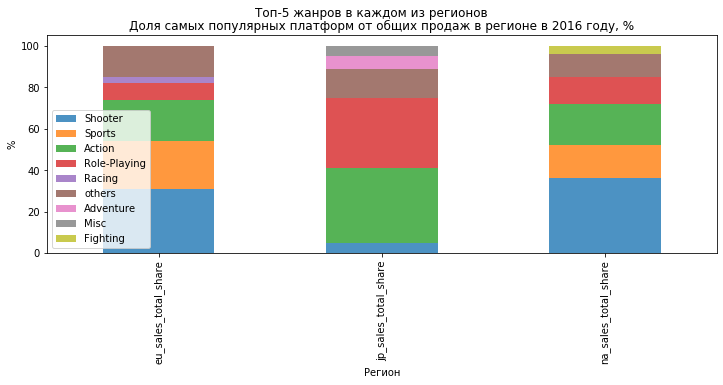

In [39]:
result = pd.merge(top_genres_eu5, top_genres_jp5, on='genre', how='outer')
result = pd.merge(result, top_genres_na5, on='genre', how='outer')
result=result.set_index('genre')
result=result.transpose()
print(result)

result.plot(kind='bar', stacked='True', figsize=(12,4), alpha=0.8)
subtitle_string = "Топ-5 жанров в каждом из регионов"
title_string = "Доля самых популярных платформ от общих продаж в регионе в 2016 году, %"

plt.xlabel('Регион')
plt.ylabel('%')

plt.suptitle(subtitle_string)
plt.title(title_string)
plt.legend()

В Европе и Северной Америке самый популярный жанр - шутеры. На втором и третьем месте - спортивные игры и Action.
В Японии почти не играют в шутеры, зато очень популярны Role-Playing. Игры Action здесь тоже популярнее, чем в других регионах.

## Рейтинги

In [40]:
top_rating=games.query('year_of_release==2016').pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()

top_rating['eu_sales_total_share']=(top_rating['eu_sales']*100/top_rating['eu_sales'].sum()).astype(int)
top_rating['jp_sales_total_share']=(top_rating['jp_sales']*100/top_rating['jp_sales'].sum()).astype(int)
top_rating['na_sales_total_share']=(top_rating['na_sales']*100/top_rating['na_sales'].sum()).astype(int)

print(top_rating.head(5))

    rating  eu_sales  jp_sales  na_sales  eu_sales_total_share  \
0        E     13.61      1.07      7.97                    26   
1     E10+      3.81      0.45      3.81                     7   
2        M     16.54      1.20     15.67                    32   
3        T      9.79      2.27      8.95                    19   
4  no data      7.47     14.32      8.53                    14   

   jp_sales_total_share  na_sales_total_share  
0                     5                    17  
1                     2                     8  
2                     6                    34  
3                    11                    19  
4                    74                    18  


In [41]:
top_rating_eu=top_rating[['rating', 'eu_sales_total_share']]
top_rating_eu5=top_rating_eu.nlargest(5, 'eu_sales_total_share')

new_row = pd.DataFrame(data = {
    'rating' : ['others'],
    'eu_sales_total_share' : [100-top_rating_eu5['eu_sales_total_share'].sum()]
})

rating = pd.concat([top_rating_eu5, new_row])

print(top_rating_eu5)

    rating  eu_sales_total_share
2        M                    32
0        E                    26
3        T                    19
4  no data                    14
1     E10+                     7


In [42]:
top_rating_jp=top_rating[['rating', 'jp_sales_total_share']]
top_rating_jp5=top_rating_jp.nlargest(5, 'jp_sales_total_share')

new_row = pd.DataFrame(data = {
    'rating' : ['others'],
    'jp_sales_total_share' : [100-top_rating_jp5['jp_sales_total_share'].sum()]
})

top_rating_jp5 = pd.concat([top_rating_jp5, new_row])

print(top_rating_jp5)

    rating  jp_sales_total_share
4  no data                    74
3        T                    11
2        M                     6
0        E                     5
1     E10+                     2
0   others                     2


In [43]:
top_rating_na=top_rating[['rating', 'na_sales_total_share']]
top_rating_na5=top_rating_na.nlargest(5, 'na_sales_total_share')

new_row = pd.DataFrame(data = {
    'rating' : ['others'],
    'na_sales_total_share' : [100-top_rating_na5['na_sales_total_share'].sum()]
})

top_rating_na5 = pd.concat([top_rating_na5, new_row])

print(top_rating_na5)

    rating  na_sales_total_share
2        M                    34
3        T                    19
4  no data                    18
0        E                    17
1     E10+                     8
0   others                     4


In [44]:
result_rating = pd.merge(top_rating_eu5, top_rating_jp5, on='rating', how='outer')
result_rating = pd.merge(result_rating, top_rating_na5, on='rating', how='outer')
result_rating=result_rating.set_index('rating')
result_rating=result_rating.transpose()

rating,M,E,T,no data,E10+,others
eu_sales_total_share,32.0,26.0,19.0,14.0,7.0,NaN
jp_sales_total_share,6.0,5.0,11.0,74.0,2.0,2.0
na_sales_total_share,34.0,17.0,19.0,18.0,8.0,4.0


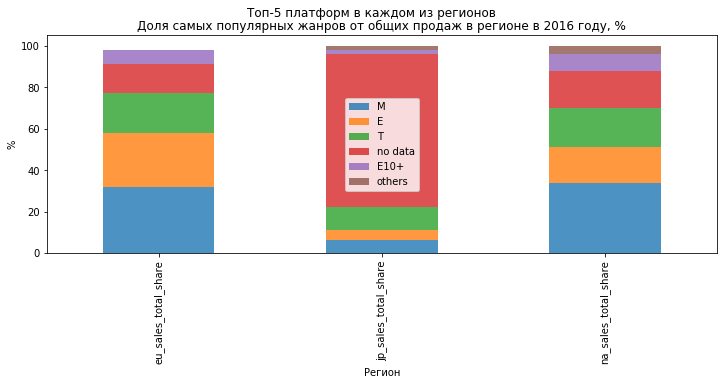

In [45]:
result_rating.plot(kind='bar', stacked='True', figsize=(12,4), alpha=0.8)
subtitle_string = "Топ-5 платформ в каждом из регионов"
title_string = "Доля самых популярных жанров от общих продаж в регионе в 2016 году, %"

plt.xlabel('Регион')
plt.ylabel('%')

plt.suptitle(subtitle_string)
plt.title(title_string)
plt.legend()

display(result_rating)

В Японии преобладают игры, которым не присвоен возрастной рейтинг. Это связано с тем, что там действует своя система рейтингования, а ESRB не является обязательной.

В Европе и США треть игр - для взрослых (старше 17 лет). 

## Самые популярные игры

Узнаем, какие игры были популярны в трех регионах.

In [46]:
top_games=games.query('year_of_release==2016').pivot_table(index='name', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()

top_games['eu_sales_total_share']=(top_games['eu_sales']*100/top_games['eu_sales'].sum()).astype(int)
top_games['jp_sales_total_share']=(top_games['jp_sales']*100/top_games['jp_sales'].sum()).astype(int)
top_games['na_sales_total_share']=(top_games['na_sales']*100/top_games['na_sales'].sum()).astype(int)



In [47]:
top_games_jp=top_games[['name', 'jp_sales_total_share']]
top_games_jp5=top_games_jp.nlargest(10, 'jp_sales_total_share')

top_games_eu=top_games[['name', 'eu_sales_total_share']]
top_games_eu5=top_games_eu.nlargest(10, 'eu_sales_total_share')

top_games_na=top_games[['name', 'na_sales_total_share']]
top_games_na5=top_games_na.nlargest(10, 'na_sales_total_share')

display(top_games_jp5)
display(top_games_eu5)
display(top_games_na5)



,name,jp_sales_total_share
179,Pokemon Sun/Moon,11
291,Yokai Watch 3,6
75,Dragon Quest Builders: Revive Alefgard,3
76,Dragon Quest Heroes II: Twin Kings and the Pro...,3
77,Dragon Quest Monsters Joker 3,3
119,Jikkyou Powerful Pro Baseball 2016,2
128,Kirby: Planet Robobot,2
176,Persona 5,2
290,Yokai Sangokushi,2
6,Ace Attorney 6,1


,name,eu_sales_total_share
89,FIFA 17,17
31,Battlefield 1,6
40,Call of Duty: Infinite Warfare,5
264,Tom Clancy's The Division,4
272,Uncharted 4: A Thief's End,4
90,Far Cry: Primal,3
71,Doom (2016),2
142,Mafia III,2
171,Overwatch,2
179,Pokemon Sun/Moon,2


,name,na_sales_total_share
40,Call of Duty: Infinite Warfare,6
179,Pokemon Sun/Moon,6
264,Tom Clancy's The Division,6
31,Battlefield 1,5
141,Madden NFL 17,5
158,NBA 2K17,5
272,Uncharted 4: A Thief's End,4
171,Overwatch,3
55,Dark Souls III,2
71,Doom (2016),2


В 2016 году в Европе и Японии наблюдалось преобладание одной игры. В Европе 17% платежей пришлось на Fifa 17, а в Японии 11% платежей - на Pokemon Sun/Moon.

В США рынок в 2016 году был не такой консолидированный. По 6% получили следующие игры: Call of Duty: Infinite Warfare, Pokemon Sun/Moon, Tom Clancy's The Division.


<a id='the_destination8'></a>
## Проверка гипотез

По просьбе заказчика проверяем две гипотезы.
1. Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Мы возьмем для проверки этой гипотезы данные за последние три года. При этом не будем учитывать те игры, которым не выставлен пользовательский рейтинг.

In [48]:
games_xone=games.query('platform=="XOne"&year_of_release>2013&user_score!=0')['user_score']
games_pc=games.query('platform=="PC"&year_of_release>2013&user_score!=0')['user_score']


alpha=0.05

results = st.ttest_ind(games_xone, games_pc, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


In [49]:
print(games_xone.mean())
print(games_pc.mean())

6.594545454545456
6.298360655737705


2. Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
Мы возьмем для проверки этой гипотезы данные о продажах игр за последние три года. При этом не будем учитывать те игры, которым не выставлен пользовательский рейтинг.

In [50]:
games_action=games.query('genre=="Action"&year_of_release>2013&user_score!=0')['user_score']
games_sports=games.query('genre=="Sports"&year_of_release>2013&user_score!=0')['user_score']


alpha=0.05

results = st.ttest_ind(games_action, games_sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [51]:
print(games_action.median())
print(games_sports.median())

7.1
5.5


Мы не смогли отвергнуть нулевую гипотезу о том, что игры платформ XBox и PC одинаковые - в среднем они почти не отличаются.

Нам пришлось отвергнуть нулевую гипотезу о том, что игры жанров Action и Sport имеют одинаковые рейтинги. Они разные, притом рейтинг Sports в среднем на 50% ниже, чем Action.

<a id='the_destination9'></a>

## Вывод

- Данные

Для анализа нам были доступны данные о продажах игр в 1985-2016 годах. В датасете есть информация о дате выпуска игры, платформе, на которой она выпущена, игровом жанре, продажах в разных регионах, пользовательских рейтингах и рейтингах критиков.

Мы взяли данные из открытого источника - энтузиаст по имени Rush Kirubi спарсил данные с сайта VGChartz, который публикует информацию о продажах видеоигр, и сайта Metacritic, который публикует данные о рейтингах.

Датасет был сформирован 22 декабря 2016 года.

Мы удалили строки, где пропущено название игры и год выпуска игры.
Остальные пропущенные значения заменили на "нет данных" или нули, чтобы можно было обращаться с этим столбцом как числовым.

- Сроки продаж игры

С помощью дополнительных данных из того же источника мы узнали, что в среднем 60% игр, которые покупались в течение года, не будут продаваться в другие годы. Их срок жизни - лишь один год.

что больше 60% игр, находящихся в продаже в 2005-2020 годах, продаются лишь один год - 100% их продаж происходит лишь в течение одного года.

Но, например, Grand Theft Auto V для PS4, вышедший в 2014 году, и Call of Duty: Infinite Warfare для XOne, вышедший в 2016 году, пользовались популярностью больше одного года. И хотя разумнее всего рекламировать игру перед и сразу после релиза, когда цены на нее и спрос максимальные, в случае выхода dlc (нового платного контента, дополняющего игру), можно дать рекламу еще раз, таргетируя ее на заинтересованных в игре пользователей.

Можно было бы выгрузить с помощью Web Archive данные за 22 декабря, когда был выгружен основной датасет, но не удалось подобрать дату, когда они на 100% соответстветствовали бы. В следующий раз можно выгружать эти данные вместе.

- Состояние рынка

Если до 2010 года годовые продажи игр доходили до 700 млн долларов, то в 2016 году они составляли 130 млн долларов.
При этом выручка в расчете на игру сильно снизилась в 91-м году - после выхода хитов Super Mario (1985), Duck Hunt (1984) и Tetris (1989), но с тех пор оставалась стабильно низкой. В 2015 и 2016 годах она еще снизилась, возможно, из-за финансового кризиса.

Очевидно, мы имеем дело с падающим рынком. Возможно, игровые платформы уступают место онлайн-играм и мобильным играм. В этой ситуации, возможно, стоит рассмотреть варианты диверсификации продаж за счет других смежных рынков.

- Жизненный цикл платформы

Жизненный цикл платформы - около 5 лет. Рекламировать стоит те платформы, которые показали хорошие результаты или рост за предыдущий год.

В 2016 году наиболее продаваемые игры выходили на Play Station 4 и Xbox One и портативнаой приставке 3DS от Nintendo. Кроме этого довольно популярны игры для персонального компьютера. И хотя PC отстает от трех самых продаваемых платформ - формально PC можно было бы отбросить, не стоит этого делать. Эта платформа - долгожитель, и держит популярность дольше среднего, как видно на графике выше.

Самые популярные сейчас платформы, XOne и PS4, были выпущены на рынок в 2013 году. С тех пор для PS4 вышло в 1,5 раза больше игр (392 против 247). Медианные выручки каждой игры на этих платформах почти одинаковые (у XOne немного больше - 0,22 млн долларов против 0,2). Но средний показатель выше у PS4 благодаря очень успешным продажам Call of Duty, GTA и FIFA.

Суммарная выручка одних и тех же игр почти в два раза больше на PS4.

- Влияние оценок других пользователей на продажи

Продажи больше коррелируют с оценками критиков, чем оценками других пользователей (0,33 против 0,03). Что интересно, влияние мнения критиков выше в Европе (0,3) и Северной Америке (0,3), чем в Японии (0,13).

Зато в Японии больше влияние оценок пользователей (0,13 в Японии против 0,06 в Европе и 0,09 в США).

Этот показатель не может быть единственным при принятии решения. У многих игр отсутствует рейтинг, в общей сложности примерно у половины. В том числе у тех, что показавали большие продажи. Характерный пример - Call of Duty: Black Ops 3, который собрал 14,63 млн долларов или около 5% выручки всех игр в 2015 году.

Возможно, следует усовершенствовать методику сбора информации о рейтингах игр.

- Самые популярные жанры

В 2014-2016 годах "стрелялки" в среднем продавались в несколько раз лучше, чем игры других жанров (1,3 млн долларов в среднем на игру, что примерно в три раза лучше среднего). На втором месте - спортивные игры (0,7 млн долларов на игру).

Кроме этого, выше среднего продажи игр в следующих жанрах: Fighting, Platform, Role-Playing.

Игры жанра Action дают большой доход в целом, но принадлежность к этому жанру - не залог успеха. Таких игр выпускается очень много, и многие из них проваливаются.

- Портрет пользователя

<b>Платформы.</b> В Европе и Северной Америке лидируют Play Station 4 и Xbox One. В обоих регионах на игры для этих двух платформ приходится 80% рынка игр.
В Японии ситуация другая, там заметное место занимают портативные платформы (те, для которых не нужен экран; они хорошо подходят для игры, например, в транспорте). На первом по продажам месте там игры для 3DS от Nintendo, а третье - портативная PSV. ПРи этом в Японии, в отличие от Европы и Северной Америки, почти не играют на PC.

PS4 занимает в Японии второе место по продажам игр, то есть эта платформа популярна во всех трех регионах.

<b>Жанры.</b> В Европе и Северной Америке самый популярный жанр - шутеры. На втором и третьем месте - спортивные игры и Action.
В Японии почти не играют в шутеры, зато очень популярны Role-Playing. Игры Action здесь тоже популярнее, чем в других регионах.

<b>Влияние возрастных рейтингов.</b> В Японии преобладают игры, которым не присвоен возрастной рейтинг. Это связано с тем, что там действует своя система рейтингования, а ESRB не является обязательной.

В Европе и США треть игр - для взрослых (старше 17 лет). 

<b>Самые продаваемые игры.</b> В 2016 году в Европе и Японии наблюдалось преобладание одной игры. В Европе 17% платежей пришлось на Fifa 17, а в Японии 11% платежей - на Pokemon Sun/Moon.

В США рынок в 2016 году был не такой консолидированный. По 6% получили следующие игры: Call of Duty: Infinite Warfare, Pokemon Sun/Moon, Tom Clancy's The Division.

- Проверка гипотез

Мы не смогли отвергнуть нулевую гипотезу о том, что игры платформ XBox и PC одинаковые - в среднем они почти не отличаются.

Нам пришлось отвергнуть нулевую гипотезу о том, что игры жанров Action и Sport имеют одинаковые рейтинги. Они разные, притом рейтинг Sports в среднем на 50% ниже, чем Action.